# Proyek Pertama, Predict Analysis: [Credit Risk]
- **Nama:** [Siti Septiyah Agustin]
- **Email:** [sitiagustin561@gmail.com]
- **ID Dicoding:** [sitiseptiyah]

## Import Semua Packages/Library yang Digunakan

In [4]:
!pip install gdown


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


AttributeError: module 'numpy.random' has no attribute 'mtrand'

## Load Dataset

- dataset yang saya pakai adalah dataset credit risk, yang dimana tujuan saya adalah memprediksi resiko permasalah credit untuk mengoptimalkan penilaian risiko kredit, meminimalkan kemungkinan kegagalan bayar, dan menjaga stabilitas finansial lembaga keuangan.
berikut untuk link dataset [kaggle] (https://www.kaggle.com/datasets/omarc4gk/credit-risk-dataset).
- saya melakukan load dataset dengan mengunggah dataset ke google drive untuk memudahkan 

In [ ]:
!gdown 1RYzcXn6U_mNyuhYn2JO9u51FinoXdP4V

Downloading...
From: https://drive.google.com/uc?id=1RYzcXn6U_mNyuhYn2JO9u51FinoXdP4V
To: /content/credit_risk_dataset.csv
100% 1.80M/1.80M [00:00<00:00, 79.9MB/s]


In [ ]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## EDA

- kode menampilkan informasi tentang struktur DataFrame secara keseluruhan.
dengan total data 32.581 baris

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


- menghasilkan statistik deskriptif untuk kolom-kolom numerik di DataFrame

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


- mengecek missing data dan menangani missing data

In [ ]:
missing_data = df.isnull().sum()
print("\nJumlah Data yang Hilang per Kolom:")
print(missing_data)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

missing_data_after = df.isnull().sum()
print("\nJumlah Data yang Hilang Setelah Pengisian:")
print(missing_data_after)


Jumlah Data yang Hilang per Kolom:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Jumlah Data yang Hilang Setelah Pengisian:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


- mengkategorikan featur numerik dan kategorikal

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("\nKolom Numerikal:", list(numerical_columns))
print("Kolom Kategorikal:", list(categorical_columns))


Kolom Numerikal: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
Kolom Kategorikal: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


- visualisasi distibusi feature numerik

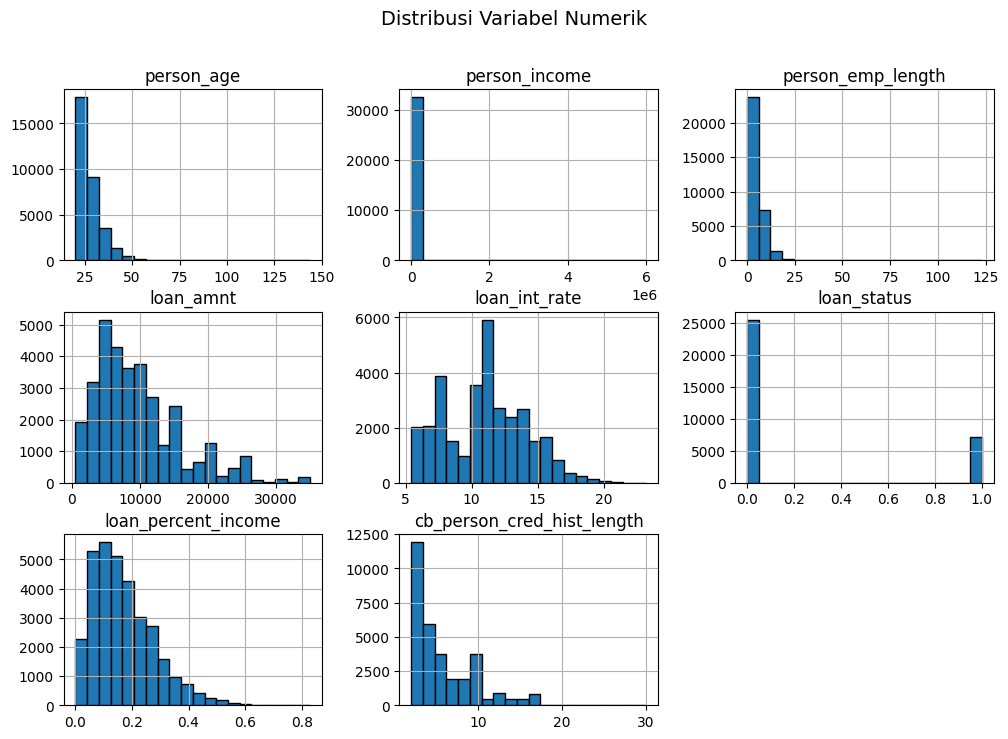

In [ ]:
# Membuat histogram untuk kolom numerik
df[numerical_columns].hist(figsize=(12, 8), bins=20, edgecolor='black', layout=(3, 3))  # 3x3 untuk 9 kolom
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

- mengecek data apakah terdapat outlier

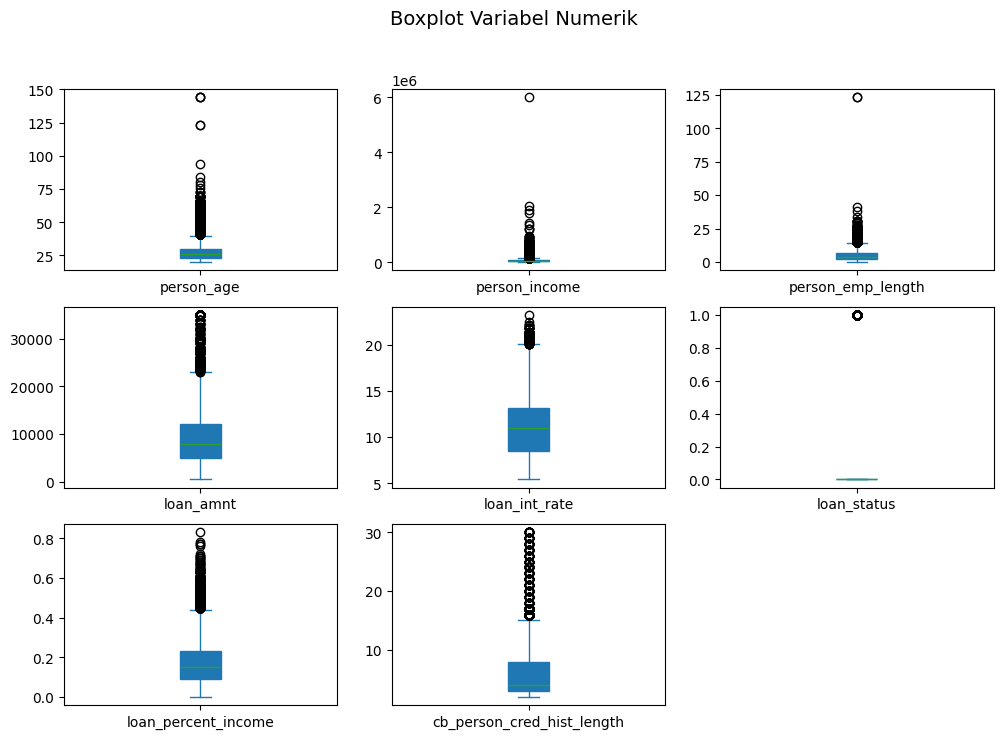

In [ ]:
# Membuat boxplot untuk kolom numerik
num_rows = (len(numerical_columns) // 3) + 1
df[numerical_columns].plot(kind='box', subplots=True, layout=(num_rows, 3), figsize=(12, 8), patch_artist=True)
plt.suptitle("Boxplot Variabel Numerik", fontsize=14)
plt.show()


- menampilkan hubungan antar pasangan variabel dalam DataFrame

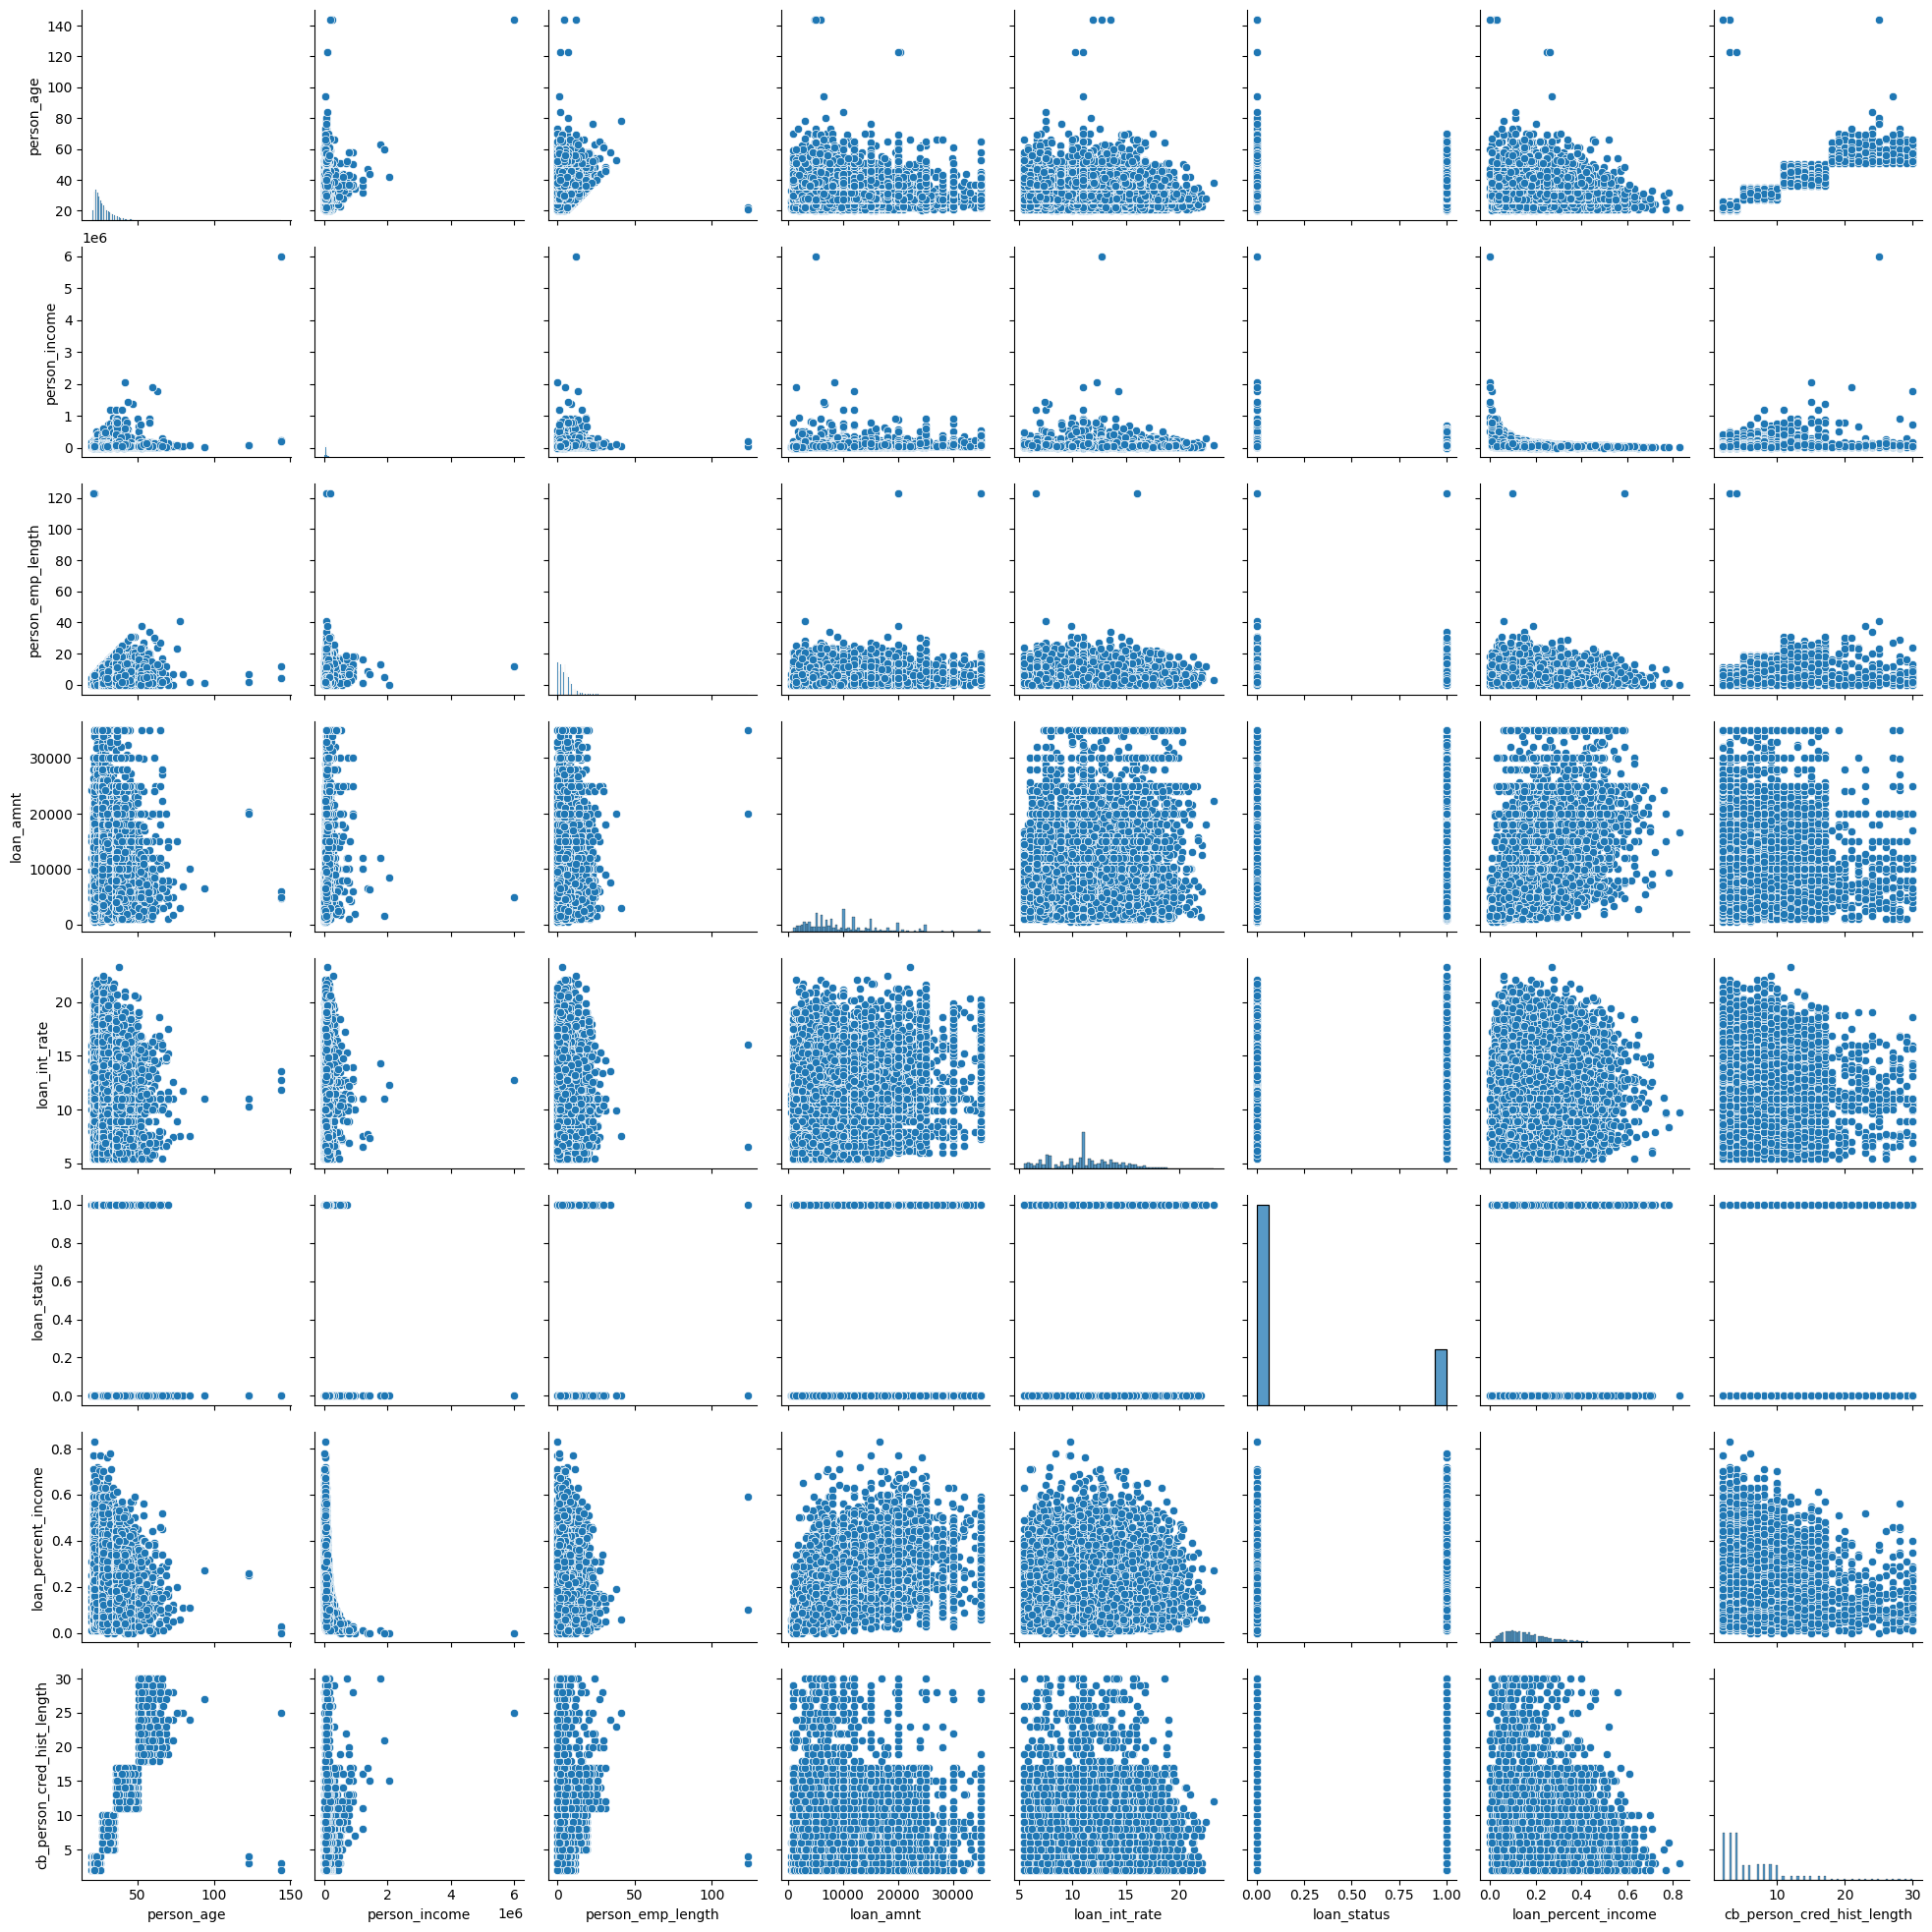

In [ ]:
sns.pairplot(df)

- menampilkan korelari antar feature numerik

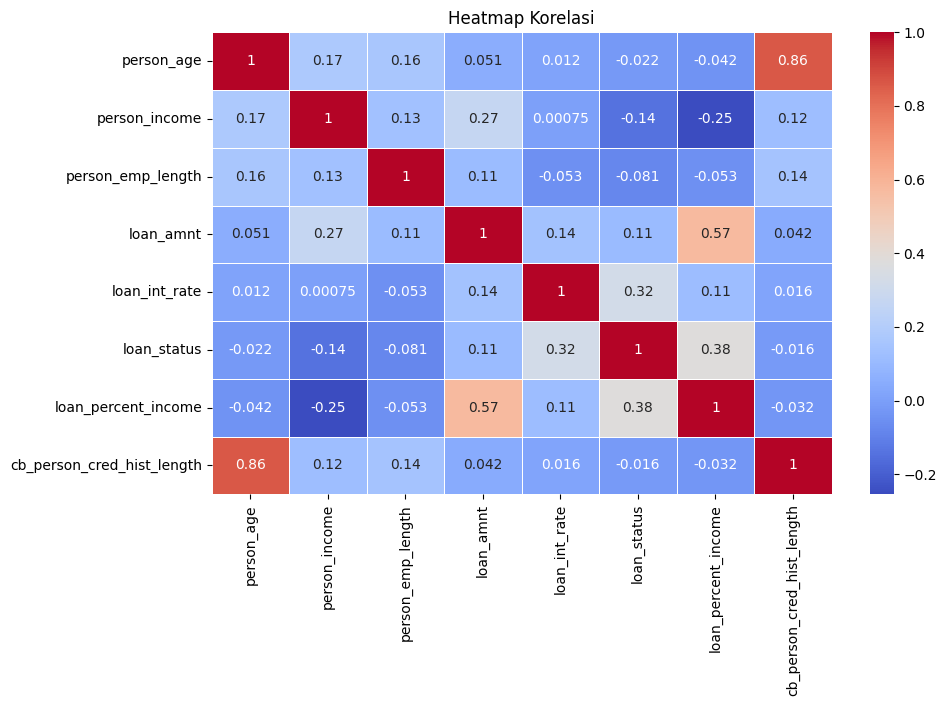

In [ ]:
# Membuat heatmap korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()


## Preprocessing

- menangani data duplikat

In [ ]:
# Menghapus data duplikat
df = df.drop_duplicates()

# Memverifikasi jumlah baris setelah penghapusan duplikat
print(f"Jumlah baris setelah penghapusan duplikat: {df.shape[0]}")


Jumlah baris setelah penghapusan duplikat: 32416


- dari hasil eda, masih terlihat yang memiliki data outlier. berikut adalah kode untuk menangani outlier data

In [ ]:
import pandas as pd

# Fungsi untuk mendeteksi dan mengganti outlier dengan median
def replace_outliers_with_median(df, columns, target_column):
    # Menghindari kolom target agar tidak diproses
    columns = [col for col in columns if col != target_column]

    # Iterasi untuk setiap kolom numerik yang tidak termasuk kolom target
    for col in columns:
        # Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Menghitung Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Menentukan batas bawah dan atas untuk mendeteksi outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Mengganti outlier dengan nilai median dari kolom tersebut
        median_value = df[col].median()

        # Ganti nilai yang lebih kecil dari lower_bound atau lebih besar dari upper_bound dengan median
        df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    return df

# Menentukan kolom numerik untuk mendeteksi outlier
numerical_columns = df.select_dtypes(include=['number']).columns

# Kolom target adalah 'loan_status', yang tidak akan diproses untuk outlier
target_column = 'loan_status'  # Kolom target adalah 'loan_status'

# Mengganti outlier dengan median untuk kolom numerik selain kolom target
df = replace_outliers_with_median(df, numerical_columns, target_column)

# Memverifikasi jumlah baris setelah mengganti outlier
print(f"Jumlah baris setelah mengganti outlier dengan median: {df.shape[0]}")


Jumlah baris setelah mengganti outlier dengan median: 32416


<ipython-input-15-a1d69aabc877>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
<ipython-input-15-a1d69aabc877>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
<ipython-input-15-a1d69aabc877>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

- melakukan encoding feature kategorikal yang sudah di kategorikan di eda

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Melakukan Label Encoding pada kolom kategorikal
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])  # Mengonversi string menjadi angka

# Menampilkan jumlah baris setelah encoding
print(f"Jumlah baris setelah mengganti outlier dan melakukan encoding: {df.shape[0]}")

Jumlah baris setelah mengganti outlier dan melakukan encoding: 32416


<ipython-input-16-2ba9a4c85579>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])  # Mengonversi string menjadi angka
<ipython-input-16-2ba9a4c85579>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])  # Mengonversi string menjadi angka
<ipython-input-16-2ba9a4c85579>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

- melakukan standarisasi feature dengan mengubah data agar setiap feature memiliki nilai skala yang sama rata. 
- Menghapus kolom loan_status dari DataFrame df karena ini adalah target (variabel yang ingin diprediksi), dan kita hanya akan menstandarkan fitur.

In [ ]:
# Melakukan standarisasi pada fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('loan_status', axis=1))  # Menstandarkan fitur tanpa target

# Menyimpan kolom target
y = df['loan_status']

# Menampilkan jumlah baris setelah encoding dan scaling
print(f"Jumlah baris setelah mengganti outlier, melakukan encoding, dan scaling: {X_scaled.shape[0]}")

Jumlah baris setelah mengganti outlier, melakukan encoding, dan scaling: 32416


- menangani ketidakseimbangan kelas dalam dataset, dapat di lihat pada output sebelum smote dan setelah smote

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Mengisi nilai yang hilang dengan median
imputer = SimpleImputer(strategy='median')

# Mengimputasi (mengisi) nilai NaN pada data fitur
X_imputed = imputer.fit_transform(X_scaled)

# Menggunakan SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Sebelum SMOTE
print("\nDistribusi kelas sebelum SMOTE:")
print(y.value_counts())

# Setelah SMOTE
print("\nDistribusi kelas setelah SMOTE:")
print(y_resampled.value_counts())

# Menampilkan jumlah data setelah SMOTE
print(f"\nJumlah data setelah SMOTE: {X_resampled.shape[0]}")



Distribusi kelas sebelum SMOTE:
loan_status
0    25327
1     7089
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
loan_status
1    25327
0    25327
Name: count, dtype: int64

Jumlah data setelah SMOTE: 50654


## Splitting

- membagi datadengan perbandingan 80% untuk training dan 20% untuk test

In [ ]:
# Membagi data menjadi training set dan test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Menampilkan ukuran data setelah pembagian
print(f"Jumlah data untuk training: {X_train.shape[0]}")
print(f"Jumlah data untuk testing: {X_test.shape[0]}")

Jumlah data untuk training: 40523
Jumlah data untuk testing: 10131


### Modelling dan evaluasi
- melakukan pelatihan menggunakan 3 algoritma

In [ ]:
# prompt: dari train di atas buatkan model random forest clasifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Melatih model dengan data training
rf_classifier.fit(X_train, y_train)

# Memprediksi data testing
y_pred = rf_classifier.predict(X_test)

KeyboardInterrupt: 

- Kode ini digunakan untuk melatih dan mengevaluasi model Linear Regression pada data pelatihan dan pengujian dengan menghitung metrik evaluasi seperti MAE, MSE, RMSE, dan R² untuk kedua set data. Hasil evaluasi ini memberikan gambaran tentang kinerja model, mengindikasikan apakah model dapat mengeneralisasi dengan baik pada data yang belum terlihat sebelumnya.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Melatih model dengan data training
gb_classifier.fit(X_train, y_train)

# Memprediksi data testing
y_pred_gb = gb_classifier.predict(X_test)

Evaluasi Model 1: Linear Regression

Test set evaluation (Linear Regression):
MAE: 0.3440589809114161, MSE: 0.16463504809209353, RMSE: 0.40575244680974326, R2: 0.3414544115661613

Train set evaluation (Linear Regression):
MAE: 0.3438712682797755, MSE: 0.16493179245233947, RMSE: 0.4061179538660406, R2: 0.34027249231459145


- melatih dan mengevaluasi model **Random Forest Regressor** pada data pelatihan dan pengujian dengan menghitung metrik evaluasi seperti MAE, MSE, RMSE, dan R². Hasil evaluasi ini memberikan informasi tentang seberapa baik model dapat menggeneralisasi pada data pengujian dan bagaimana kinerjanya pada data pelatihan.


In [ ]:
# prompt: selanjutnya model logistic regression

from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
logreg_classifier = LogisticRegression(random_state=42)

# Melatih model dengan data training
logreg_classifier.fit(X_train, y_train)

# Memprediksi data testing
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))



Evaluasi Model 2: Random Forest Regressor

Test set evaluation (Random Forest):
MAE: 0.11403316553153686, MSE: 0.04657385253183299, RMSE: 0.21580976004767022, R2: 0.8137030633717187

Train set evaluation (Random Forest):
MAE: 0.04184142338918639, MSE: 0.00648803889149372, RMSE: 0.08054836367980246, R2: 0.9740478311427553


- melatih dan mengevaluasi model **Gradient Boosting Regressor** pada data pelatihan dan pengujian dengan menghitung metrik evaluasi seperti MAE, MSE, RMSE, dan R². Hasil evaluasi ini memberikan gambaran tentang kinerja model pada data pelatihan dan pengujian, serta seberapa baik model dapat menggeneralisasi pada data yang tidak terlihat sebelumnya.


In [ ]:
#Cek akurasi train dan test
mse = pd.DataFrame(columns=['train', 'test'], index=['Gradient Boosting Classifier', 'Logistic Regression', 'Random Forest Classifier'])
model_dict = {'Gradient Boosting Classifier': gb_classifier, 'Logistic Regression': logreg_classifier, 'Random Forest Classifier': rf_classifier}
  
for name, model in model_dict.items():
    # X_res and y_res are likely meant to be X_resampled and y_resampled
    # Change X_res to X_resampled and y_res to y_resampled
    mse.loc[name, 'train'] = model.score(X_resampled, y_resampled)*100  
    mse.loc[name, 'test'] = model.score(X_test, y_test)*100
 
mse


Evaluasi Model 3: Gradient Boosting Regressor

Test set evaluation (Gradient Boosting):
MAE: 0.21534771770088854, MSE: 0.08616870405384734, RMSE: 0.2935450630718346, R2: 0.6553223595259035

Train set evaluation (Gradient Boosting):
MAE: 0.2124268491282564, MSE: 0.08325439710755617, RMSE: 0.2885383806490155, R2: 0.6669822410164425


- menyusun hasil evaluasi dari tiga model regresi (Linear Regression, Random Forest Regressor, dan Gradient Boosting Regressor) berdasarkan metrik MAE, MSE, RMSE, R², dan hasil cross-validation dalam sebuah DataFrame untuk memudahkan perbandingan kinerja antar model.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming you have already trained the models (rf_classifier, gb_classifier, logreg_classifier)
# and have the training and testing accuracy scores.  Replace these with your actual scores.

models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression']
train_accuracies = [accuracy_score(y_train, rf_classifier.predict(X_train)),
                    accuracy_score(y_train, gb_classifier.predict(X_train)),
                    accuracy_score(y_train, logreg_classifier.predict(X_train))]
test_accuracies = [accuracy_score(y_test, y_pred),
                   accuracy_score(y_test, y_pred_gb),
                   accuracy_score(y_test, y_pred_logreg)]

# Create a dictionary to store the accuracy scores
accuracy_scores = {
    'model': models,
    'train': train_accuracies,
    'test': test_accuracies
}

# Create a Pandas DataFrame from the dictionary
df_accuracy = pd.DataFrame(accuracy_scores)

# Plotting the accuracies
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed

df_accuracy.plot(x='model', y=['train', 'test'], kind='bar', ax=ax)

plt.title('Model Accuracy Comparison (Train vs. Test)')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Dataset')
plt.tight_layout()  # Adjust layout for better spacing
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

plt.show()


Evaluation Results:
                         Model       MAE       MSE      RMSE  R2 Square  \
0            Linear Regression  0.344059  0.164635  0.405752   0.341454   
1      Random Forest Regressor  0.114033  0.046574  0.215810   0.813703   
2  Gradient Boosting Regressor  0.215348  0.086169  0.293545   0.655322   

   Cross Validation  
0         -0.165009  
1         -0.048579  
2         -0.084528  


In [ ]:
# prompt: lakukan tuning pada model random forest, gunakan randomsearch agar proces run tidak lama, buat lebih tidak lama untuk di run

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomForestClassifier
param_dist = {
    'n_estimators': [50, 100, 200],  # Reduced number of estimators
    'max_depth': [None, 10, 20],  # Reduced max_depth options
    'min_samples_split': [2, 5, 10],  # Reduced min_samples_split options
    'min_samples_leaf': [1, 2, 4],  # Reduced min_samples_leaf options
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),  # Use your classifier
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings that are sampled. Reduce for faster execution.
    cv=3,  # Number of cross-validation folds. Reduce for faster execution.
    scoring='accuracy',  # Use an appropriate scoring metric
    n_jobs=-1,  # Use all available cores
    verbose=1,  # Print progress updates
    random_state=42
)

# Perform the randomized search
random_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Evaluate the best model on the test set
best_rf_classifier = random_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))


### Hasil Evaluasi

Dari hasil evaluasi, **Random Forest Regressor** adalah model yang terbaik. Berikut adalah beberapa alasan utama yang mendasari keputusan ini:

1. **Akurasi yang Lebih Baik (MAE, MSE, RMSE)**: Random Forest memiliki MAE, MSE, dan RMSE yang jauh lebih rendah dibandingkan dengan Linear Regression dan Gradient Boosting. Ini menunjukkan bahwa Random Forest lebih akurat dalam memprediksi status pinjaman.

2. **Kemampuan Menjelaskan Varians Data yang Lebih Baik (R²)**: Dengan nilai R² yang mencapai 81.37%, Random Forest dapat menjelaskan lebih dari 81% dari varians data, yang menunjukkan kemampuan model yang sangat baik dalam memprediksi target.

3. **Kinerja yang Stabil (Cross Validation)**: Meskipun nilai cross-validation masih negatif, Random Forest menunjukkan nilai yang lebih baik dibandingkan dengan Linear Regression dan Gradient Boosting, yang berarti model ini lebih mampu menggeneralisasi pada data yang tidak terlihat.

### Interpretasi Hasil:

- **MAE, MSE, RMSE**: Semakin rendah nilai-nilai ini, semakin baik model dalam memprediksi data. **Random Forest Regressor** memiliki nilai MAE, MSE, dan RMSE yang jauh lebih rendah dibandingkan kedua model lainnya, menunjukkan keunggulannya dalam akurasi prediksi.
- **R²**: Ini menunjukkan seberapa baik model dapat menjelaskan variasi dalam data. Random Forest memiliki nilai R² tertinggi (0.813703), yang menunjukkan bahwa lebih dari 81% variansi dalam data dapat dijelaskan oleh model.
- **Cross Validation**: Nilai negatif untuk cross-validation menunjukkan adanya sedikit overfitting, namun **Random Forest** menunjukkan performa terbaik meskipun ada penurunan nilai pada cross-validation dibandingkan dengan model lainnya.


## Hyperparameter Tuning

- setelah menganalisa dari ketiga model, model random forest regressor adalah model yang paling bagus untuk melakukan prediksi resiko pemberian kredit
- selanjutnya melakukan pencarian hiperparameter terbaik untuk model Random Forest Regressor menggunakan RandomizedSearchCV dengan parameter seperti jumlah estimators, kedalaman pohon, dan jumlah minimum sampel untuk pembagian dan daun. Setelah menemukan model terbaik, hasil evaluasi dengan metrik MAE, MSE, RMSE, dan R² ditampilkan untuk menilai kinerja model pada data pengujian setelah tuning hiperparameter.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
import numpy as np

# Menyiapkan model Random Forest
rf = RandomForestRegressor(random_state=42)

# Menyusun distribusi parameter yang lebih ringan untuk Random Forest
param_dist_rf = {
    'n_estimators': [50, 100],  # Jumlah pohon lebih sedikit
    'max_depth': [None, 10],     # Kedalaman maksimum pohon
    'min_samples_split': [2, 5],  # Jumlah minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2]   # Jumlah minimum sampel untuk daun
}

# Menerapkan RandomizedSearchCV untuk mencari parameter terbaik
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf,
                                      n_iter=5, cv=2, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')

# Menggunakan subset data untuk mempercepat proses
random_search_rf.fit(X_train[:1000], y_train[:1000])  # Gunakan hanya 1000 baris pertama

# Menampilkan hasil terbaik dari RandomizedSearchCV
print("Best parameters for Random Forest Regressor:", random_search_rf.best_params_)

# Model terbaik berdasarkan RandomizedSearchCV
best_rf = random_search_rf.best_estimator_

# Evaluasi hasil model terbaik pada data test
mae_test_rf = mean_absolute_error(y_test, best_rf.predict(X_test))
mse_test_rf = mean_squared_error(y_test, best_rf.predict(X_test))
rmse_test_rf = np.sqrt(mse_test_rf)  # Menghitung RMSE secara manual
r2_test_rf = r2_score(y_test, best_rf.predict(X_test))

# Hasil evaluasi model
results_df = pd.DataFrame(data=[
    ["Random Forest Regressor", mae_test_rf, mse_test_rf, rmse_test_rf, r2_test_rf]
], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

print("\nEvaluation Results after Hyperparameter Tuning:")
print(results_df)


Best parameters for Random Forest Regressor: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}

Evaluation Results after Hyperparameter Tuning:
                     Model       MAE       MSE      RMSE  R2 Square
0  Random Forest Regressor  0.229233  0.116341  0.341088   0.534633


- menampilkan dengan grafik batang untuk menunjukan feture paling berkontribusi pada model random forest regressor terhadap prediksi model berdasarkan nilai feature_importances_.

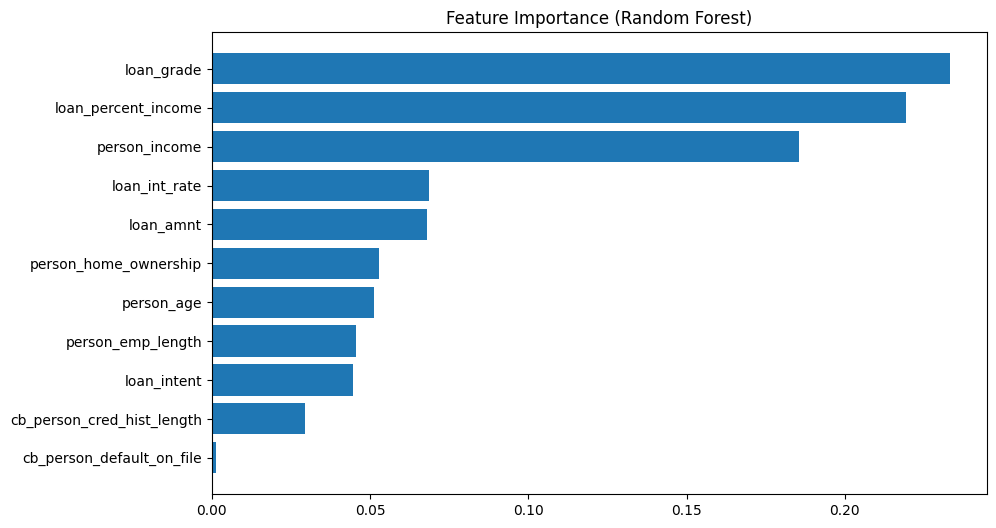

In [ ]:
# Feature importance untuk Random Forest
importances = best_rf.feature_importances_
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [df.drop('loan_status', axis=1).columns[i] for i in sorted_indices]) # Use df.columns to get column names
plt.title('Feature Importance (Random Forest)')
plt.show()